<center>
 
# 2) Bike Share Mini Project - Exploratory Data Analysis (EDA)

### by Aditi Gala

<center>
<br>

This notebook is for performing some exploratory data analysis on the bikeshare data to get a better idea of how different features are related to the number of bike rentals. We do a correlation analysis followed by multi-variate regression using the clean data.

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import statsmodels.formula.api as smf
from matplotlib import pyplot as plt
%matplotlib inline

### Daily Data

In [2]:
# Load the clean daily bikeshare data
file_path = "/Users/aditigala/Documents/Pacific/Software_Methods/Bikeshare/Data/daily_clean.csv"
daily = pd.read_csv(file_path, index_col = 0)
print("Rows, Columns = ", daily.shape)
daily.head()

Rows, Columns =  (731, 21)


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,temp,atemp,...,windspeed,casual,registered,cnt,OneHot_1,OneHot_2,OneHot_3,Year,Month,Day
0,1,2011-01-01,1,0,1,0,6,0,0.344167,0.363625,...,0.160446,331,654,985,0,1,0,2011,1,1
1,2,2011-01-02,1,0,1,0,0,0,0.363478,0.353739,...,0.248539,131,670,801,0,1,0,2011,1,2
2,3,2011-01-03,1,0,1,0,1,1,0.196364,0.189405,...,0.248309,120,1229,1349,1,0,0,2011,1,3
3,4,2011-01-04,1,0,1,0,2,1,0.200000,0.212122,...,0.160296,108,1454,1562,1,0,0,2011,1,4
4,5,2011-01-05,1,0,1,0,3,1,0.226957,0.229270,...,0.186900,82,1518,1600,1,0,0,2011,1,5


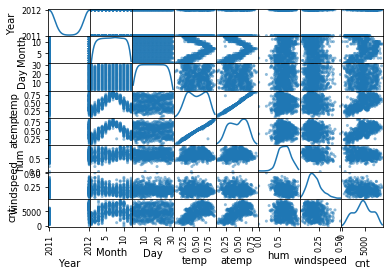

Correlation Coefficient for Count column: 
Year         0.566710
Month        0.279977
Day         -0.024204
temp         0.627494
atemp        0.631066
hum         -0.100659
windspeed   -0.234545
cnt          1.000000
Name: cnt, dtype: float64


In [3]:
# Continuous features
daily_cont = daily[["Year", "Month", "Day", "temp", "atemp", "hum", "windspeed", "cnt"]]

# Scatter plot of continous features
scatter_matrix(daily_cont, diagonal = 'kde')
plt.show()

# Correlation analysis with "count" column
print("Correlation Coefficient for Count column: ")
print(daily_cont.corr(method="pearson")["cnt"])

From the scatter plots and correlation coefficients, we get some idea of which features are related to the total daily count on bike rentals. The two features that seem to have the strongest correlation with daily count of bike rentals is temperature (temp/atemp), and Year. Windspeed and Month have a weaker correlation with total count of rentals.

In [4]:
# Multivariate Regression Analysis with continuous features
lm_daily_full = smf.ols('cnt ~ atemp + Year + windspeed + Month + hum', data = daily_cont).fit()
print(lm_daily_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.752
Model:                            OLS   Adj. R-squared:                  0.750
Method:                 Least Squares   F-statistic:                     439.9
Date:                Sun, 03 May 2020   Prob (F-statistic):          9.09e-217
Time:                        18:55:47   Log-Likelihood:                -6059.9
No. Observations:                 731   AIC:                         1.213e+04
Df Residuals:                     725   BIC:                         1.216e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.028e+06   1.45e+05    -27.723      0.0

The model summary of the full model linear regression fit (where all continuous features were selected) has an adjust R-squared of 0.750. For comparison, a simpler 2 feature model using only atemp and Year is shown below.

In [5]:
# Multivariate Regression Analysis with 2 continuous features
lm_daily_2var = smf.ols('cnt ~ atemp + Year', data = daily_cont).fit()
print(lm_daily_2var.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.688
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     802.2
Date:                Sun, 03 May 2020   Prob (F-statistic):          8.49e-185
Time:                        18:55:47   Log-Likelihood:                -6144.1
No. Observations:                 731   AIC:                         1.229e+04
Df Residuals:                     728   BIC:                         1.231e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -4.195e+06   1.61e+05    -25.986      0.0

<br><br>

### Hourly Data

In [6]:
# Load the clean hourly csv data
file_path = "/Users/aditigala/Documents/Pacific/Software_Methods/Bikeshare/Data/hourly_clean.csv"
hourly = pd.read_csv(file_path, index_col = 0)
print("Rows, Columns = ", hourly.shape)
hourly.head()

Rows, Columns =  (17379, 23)


,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,temp,...,casual,registered,cnt,OneHot_1,OneHot_2,OneHot_3,OneHot_4,Year,Month,Day
0,1,2011-01-01,1,0,1,0,0,6,0,0.24,...,3,13,16,1,0,0,0,2011,1,1
1,2,2011-01-01,1,0,1,1,0,6,0,0.22,...,8,32,40,1,0,0,0,2011,1,1
2,3,2011-01-01,1,0,1,2,0,6,0,0.22,...,5,27,32,1,0,0,0,2011,1,1
3,4,2011-01-01,1,0,1,3,0,6,0,0.24,...,3,10,13,1,0,0,0,2011,1,1
4,5,2011-01-01,1,0,1,4,0,6,0,0.24,...,0,1,1,1,0,0,0,2011,1,1


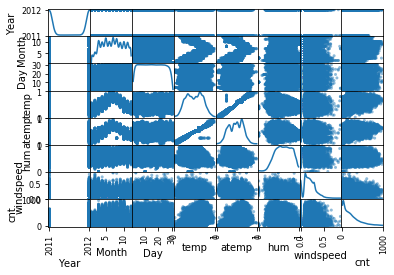

Correlation Coefficient for Count column: 
Year         0.250495
Month        0.120638
Day         -0.004312
temp         0.404772
atemp        0.400929
hum         -0.322911
windspeed    0.093234
cnt          1.000000
Name: cnt, dtype: float64


In [7]:
# Continuous features
hourly_cont = hourly[["Year", "Month", "Day", "temp", "atemp", "hum", "windspeed", "cnt"]]

# Correlation Analysis on continous features
scatter_matrix(hourly_cont, diagonal = 'kde')
plt.show()

# Correlation analysis with "count" column
print("Correlation Coefficient for Count column: ")
print(hourly_cont.corr(method="pearson")["cnt"])

We see a weaker trend in the hourly data as compared to the daily data. The two features that have the relatively strongest correlation with hourly count of bike rentals is temperature (temp/atemp), and humidity. Year and Month have a weaker correlation with total count of rentals by hour.

In [8]:
# Multivariate Regression Analysis with continuous features
lm_hourly_full = smf.ols('cnt ~ atemp + hum + Year + Month', data = hourly_cont).fit()
print(lm_hourly_full.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.306
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     1913.
Date:                Sun, 03 May 2020   Prob (F-statistic):               0.00
Time:                        18:56:09   Log-Likelihood:            -1.1187e+05
No. Observations:               17379   AIC:                         2.238e+05
Df Residuals:                   17374   BIC:                         2.238e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.547e+05   4632.080    -33.402      0.0

The model summary of the full model linear regression fit (where all continuous features were selected) has an adjusted R-squared of 0.306. This relatively low value shows us that a linear model may not be a good fit for the hourly data. 